## Import Statements

In [4]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Reading the file

news = pd.read_csv('ProcessedData.tsv', delimiter = '\t', encoding = 'utf-8')

news.head()

,NewCategory,title,author,published_date,updated_on,slug,blurb,body
0,Business & Finance,Bitcoin is down 60 percent this year. Here's w...,Timothy B. Lee,3/31/2014 14:01,12/16/2014 16:37,http://www.vox.com/2014/3/31/5557170/bitcoin-b...,Bitcoins have lost more than 60 percent of the...,The markets haven't been kind to Bitcoin in 20...
1,Crime,6 health problems marijuana could treat better...,German Lopez,3/31/2014 15:44,11/17/2014 0:20,http://www.vox.com/2014/3/31/5557700/six-probl...,Medical marijuana could fill gaps that current...,Twenty states have so far legalized the medica...
2,Business & Finance,9 charts that explain the history of global we...,Matthew Yglesias,4/10/2014 13:30,12/16/2014 15:47,http://www.vox.com/2014/4/10/5561608/9-charts-...,These nine charts from Thomas Piketty's new bo...,Thomas Piketty's book Capital in the 21st Cent...
3,Crime,Remember when legal marijuana was going to sen...,German Lopez,4/3/2014 23:25,5/6/2014 21:58,http://www.vox.com/2014/4/3/5563134/marijuana-...,"Three months after legalizing marijuana, Denve...",When Colorado legalized recreational marijuana...
4,Technology & Health,Obamacare succeeded for one simple reason: it'...,Sarah Kliff,4/1/2014 20:26,11/18/2014 15:09,http://www.vox.com/2014/4/1/5570780/the-two-re...,"After a catastrophic launch, Obamacare still s...",There's a very simple reason that Obamacare hi...


In [6]:
# Retriving unique categories
news['NewCategory'].unique()

array(['Business & Finance', 'Crime', 'Technology & Health', 'Politics',
       'Entertainment'], dtype=object)

In [7]:
news['title'] = news['title'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case
news['body'] = news['body'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case
news['NewCategory'] = news['NewCategory'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case

## Vectorization

In [8]:
# VECTORIZATION
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
# data = []
# X = vectorizer.fit_transform(news['body'].values.astype('U'))
X = vectorizer.fit_transform(news['title'])
y = news['NewCategory']

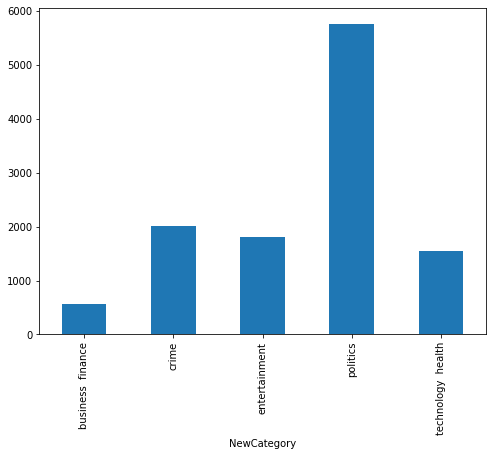

In [9]:
fig = plt.figure(figsize=(8,6))
news.groupby('NewCategory').title.count().plot.bar(ylim=0)
plt.show()

## Training SVM Model

In [10]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% split

In [11]:
# Importing SVM = training without hyperparametering
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train, y_train)
predicted = clf_svm.predict(X_test)

In [12]:
# from sklearn.metrics import accuracy_score
print("Accuracy of SVM model:", accuracy_score(y_test, predicted)*100)

Accuracy of SVM model: 74.54000855798031


In [13]:
lin_y_pred = clf_svm.predict(X_test)

In [14]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, lin_y_pred, average=None)

F1 Score for all the categories:


array([0.36065574, 0.6975547 , 0.66851595, 0.84529915, 0.63705972])

In [15]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lin_y_pred)

array([[ 33,   8,  21,  28,  23],
       [  3, 271,  25,  68,  16],
       [  8,  25, 241,  50,  32],
       [ 18,  64,  40, 989,  47],
       [  8,  26,  38,  47, 208]])

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lin_y_pred))

                    precision    recall  f1-score   support

 business  finance       0.47      0.29      0.36       113
             crime       0.69      0.71      0.70       383
     entertainment       0.66      0.68      0.67       356
          politics       0.84      0.85      0.85      1158
technology  health       0.64      0.64      0.64       327

          accuracy                           0.75      2337
         macro avg       0.66      0.63      0.64      2337
      weighted avg       0.74      0.75      0.74      2337



## Hyperparameter Tuning

In [17]:
# HyperParameter tuning = setting parameters for enhancing the training model
parameter_candidates = [
  {'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000,10000], 'gamma': [0.1,0.01,0.001, 0.0001,0.00001], 'kernel': ['rbf']}
]

In [18]:
# Create a classifier object with the classifier and parameter candidates
# clf = GridSearchCV(estimator=svm.SVC(), param_grid = parameter_candidates, n_jobs = -1)
clf = GridSearchCV(estimator=svm.SVC(), param_grid = parameter_candidates, refit = True)

In [19]:
# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

/Users/shubh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print('Best score for data1:', clf.best_score_)

Best score for data1: 0.7496255082388188


In [21]:
y_pred = clf.predict(X_test)

In [22]:
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 1000
Best Kernel: rbf
Best Gamma: 0.0001


## Performance Metrics

 1. Accuracy

In [23]:
# Performance Tuning
# Train a new classifier using the best parameters found by the grid search
print("Accuracy of SVM model:", clf.score(X_test, y_test)*100)

Accuracy of SVM model: 76.16602481814292


2. F1 Score

In [24]:
# F1 score - most important score
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.37349398, 0.71465969, 0.6893617 , 0.84650393, 0.67524116])

3. Confusion Matrix

In [25]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
b = confusion_matrix(y_test, y_pred)
b

array([[  31,    3,   21,   43,   15],
       [   3,  273,   29,   71,    7],
       [   6,   25,  243,   55,   27],
       [   7,   64,   28, 1023,   36],
       [   6,   16,   28,   67,  210]])

4. Precision and Recall

In [29]:
# # Precision Recall
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

 business  finance       0.58      0.27      0.37       113
             crime       0.72      0.71      0.71       383
     entertainment       0.70      0.68      0.69       356
          politics       0.81      0.88      0.85      1158
technology  health       0.71      0.64      0.68       327

          accuracy                           0.76      2337
         macro avg       0.70      0.64      0.66      2337
      weighted avg       0.75      0.76      0.75      2337



In [30]:
df11 = pd.DataFrame(report).transpose()
df11

,precision,recall,f1-score,support
business finance,0.584906,0.274336,0.373494,113.00000
crime,0.716535,0.712794,0.714660,383.00000
entertainment,0.696275,0.682584,0.689362,356.00000
politics,0.812550,0.883420,0.846504,1158.00000
technology health,0.711864,0.642202,0.675241,327.00000
accuracy,0.761660,0.761660,0.761660,0.76166
macro avg,0.704426,0.639067,0.659852,2337.00000
weighted avg,0.754007,0.761660,0.754124,2337.00000


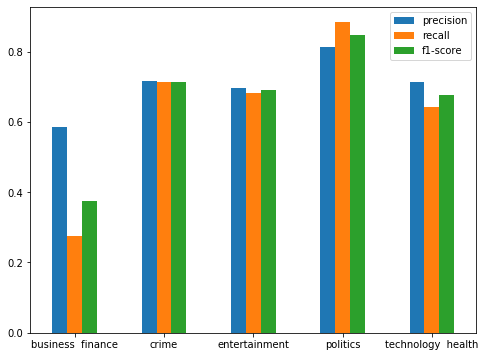

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
bb= ['precision','recall','f1-score']
# a simple line plot
df11.iloc[0:5].plot(kind='bar',y= bb,figsize=(8,6),rot=0)

In [27]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

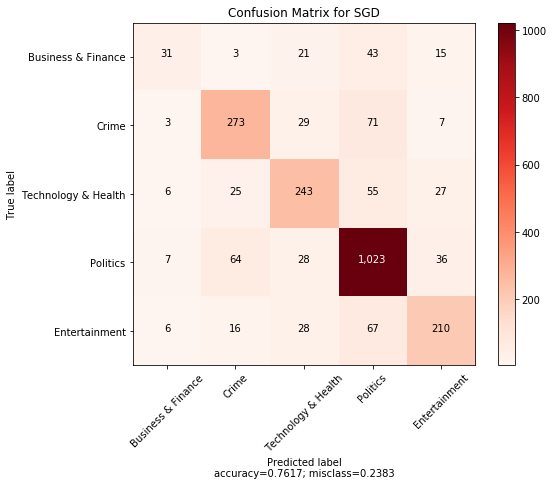

In [28]:
plot_confusion_matrix(cm           =b, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SGD")